<h1 style="text-align:center;"><b>Laboratorio 1</b></h1>
<h3 style="text-align:center;">Marcos Díaz (221102) y Daniel Machic (22118)</h3>

**Github**: https://github.com/mac2218/Seminario-Lab01.git

## Librerías

In [7]:
import numpy as np
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from scipy.stats import geom
import pandas as pd
from scipy import stats
from scipy.stats import ks_2samp, gaussian_kde, probplot

## Ejercicio 1

In [33]:
# Distribución 1
P = np.array([0.3, 0.7])

# Distribución 2
Q = np.array([0.7, 0.3])

H_P = entropy(P, base=2)
H_Q = entropy(Q, base=2)

print("Entropía de P:", H_P)
print("Entropía de Q:", H_Q)

Entropía de P: 0.8812908992306927
Entropía de Q: 0.8812908992306927


Aunque las distribuciones son distintas, la entropía de Shannon es simétrica respecto a la permutación de probabilidades, por lo que ambas tienen exactamente el mismo valor de entropía.

In [34]:
# Distribución 1
P = np.array([0.5, 0.5])

# Distribución 2
Q  = np.array([0.772, 0.114, 0.114])

H_P = entropy(P, base=2)
H_Q = entropy(Q, base=2)

print("Entropía de P:", H_P)
print("Entropía de Q:", H_Q)

Entropía de P: 1.0
Entropía de Q: 1.0025085286615678


Se considera la distribución $P=(0.5,0.5)$ cuya entropía es 1 bit.
Ajustando una distribución de tres valores de la forma $Q=(a,(1-a)/2,(1-a)/2)$, se encuentra que para $a \approx 0.772$, se cumple $H(Q)=1$.

Por lo tanto, P y Q son distribuciones distintas, incluso de diferente dimensión, que poseen exactamente la misma entropía de Shannon.

## Ejercicio 2

### a) Calcular entropía en Python

In [35]:
# Para distribución discreta

p = np.array([0.2, 0.5, 0.3])
H = entropy(p, base=2)
print("Entropía:", H)

Entropía: 1.4854752972273346


In [36]:
# Para una muestra aleatoria 

data = np.random.normal(0, 1, 1000)
# Aproximación usando histograma
hist, bin_edges = np.histogram(data, bins=30, density=True)
hist = hist / hist.sum()

H_sample = entropy(hist, base=2)
print("Entropía aproximada:", H_sample)

Entropía aproximada: 4.351653266003032


La entropía de la distribución discreta fue 1.485 bits, lo que indica un nivel intermedio de incertidumbre. Este valor es cercano al máximo posible para tres categorías (log₂(3)), lo que sugiere que la distribución es relativamente dispersa, aunque no perfectamente uniforme.

Para la muestra continua, la entropía estimada fue aproximadamente 4.33, lo cual refleja una alta dispersión de los datos, consistente con una distribución aproximadamente normal.

### b) Información mutua

In [37]:
# Ejemplo con variables discretas
X = np.random.randint(0, 2, 1000)
Y = X.copy()  # completamente dependientes

mi = mutual_info_score(X, Y)
print("Información mutua:", mi)

Información mutua: 0.6929851718108113


La información mutua obtenida fue 0.6931. Dado que las variables fueron definidas como idénticas, este valor coincide con la entropía de la variable original, indicando dependencia total entre ambas variables. Esto significa que conocer una variable elimina completamente la incertidumbre sobre la otra.

### Ejemplo de visualización

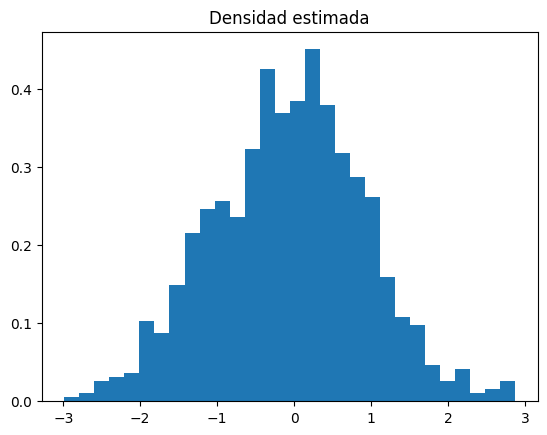

In [38]:
plt.hist(data, bins=30, density=True)
plt.title("Densidad estimada")
plt.show()

## Ejercicio 3

Error: p debe estar entre 0 y 1.


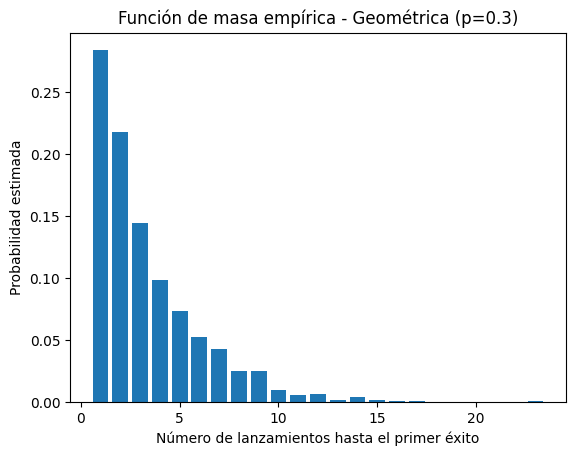

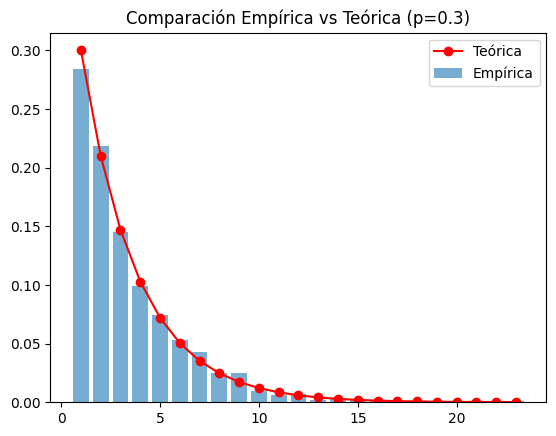

In [39]:

def simular_geom(p, N=1000):
    resultados = []
    
    for _ in range(N):
        contador = 0
        while True:
            contador += 1
            if np.random.rand() < p:
                break
        resultados.append(contador)
    
    return np.array(resultados)


# --- Entrada del usuario ---
while True:
    try:
        p = float(input("Ingrese un valor de p (0 < p < 1): "))
        if 0 < p < 1:
            break
        else:
            print("Error: p debe estar entre 0 y 1.")
    except:
        print("Ingrese un número válido.")


N = 1000
muestra = simular_geom(p, N)

# --- Estimación empírica ---
valores, counts = np.unique(muestra, return_counts=True)

plt.bar(valores, counts / N)
plt.title(f"Función de masa empírica - Geométrica (p={p})")
plt.xlabel("Número de lanzamientos hasta el primer éxito")
plt.ylabel("Probabilidad estimada")
plt.show()

# --- Comparación con la distribución teórica ---

x = np.arange(1, max(valores)+1)

plt.bar(valores, counts/N, alpha=0.6, label="Empírica")
plt.plot(x, geom.pmf(x, p), 'r-', marker='o', label="Teórica")

plt.legend()
plt.title(f"Comparación Empírica vs Teórica (p={p})")
plt.show()

Se simuló el número de lanzamientos necesarios para obtener el primer éxito en una moneda con probabilidad p, repitiendo el experimento 1000 veces. La distribución empírica obtenida coincide con la forma de la distribución geométrica teórica.

Se observa que cuando p es pequeño, la distribución tiene una cola más larga y se requieren más lanzamientos en promedio. En cambio, cuando p es grande, la probabilidad se concentra en los primeros valores, especialmente en 1.

En conclusión, el parámetro p determina directamente la forma y dispersión de la distribución geométrica, y la simulación confirma el comportamiento esperado del modelo teórico.

## Ejercicio 4

Usando p = 0.4

Comparación: Experimento vs Geom(p)


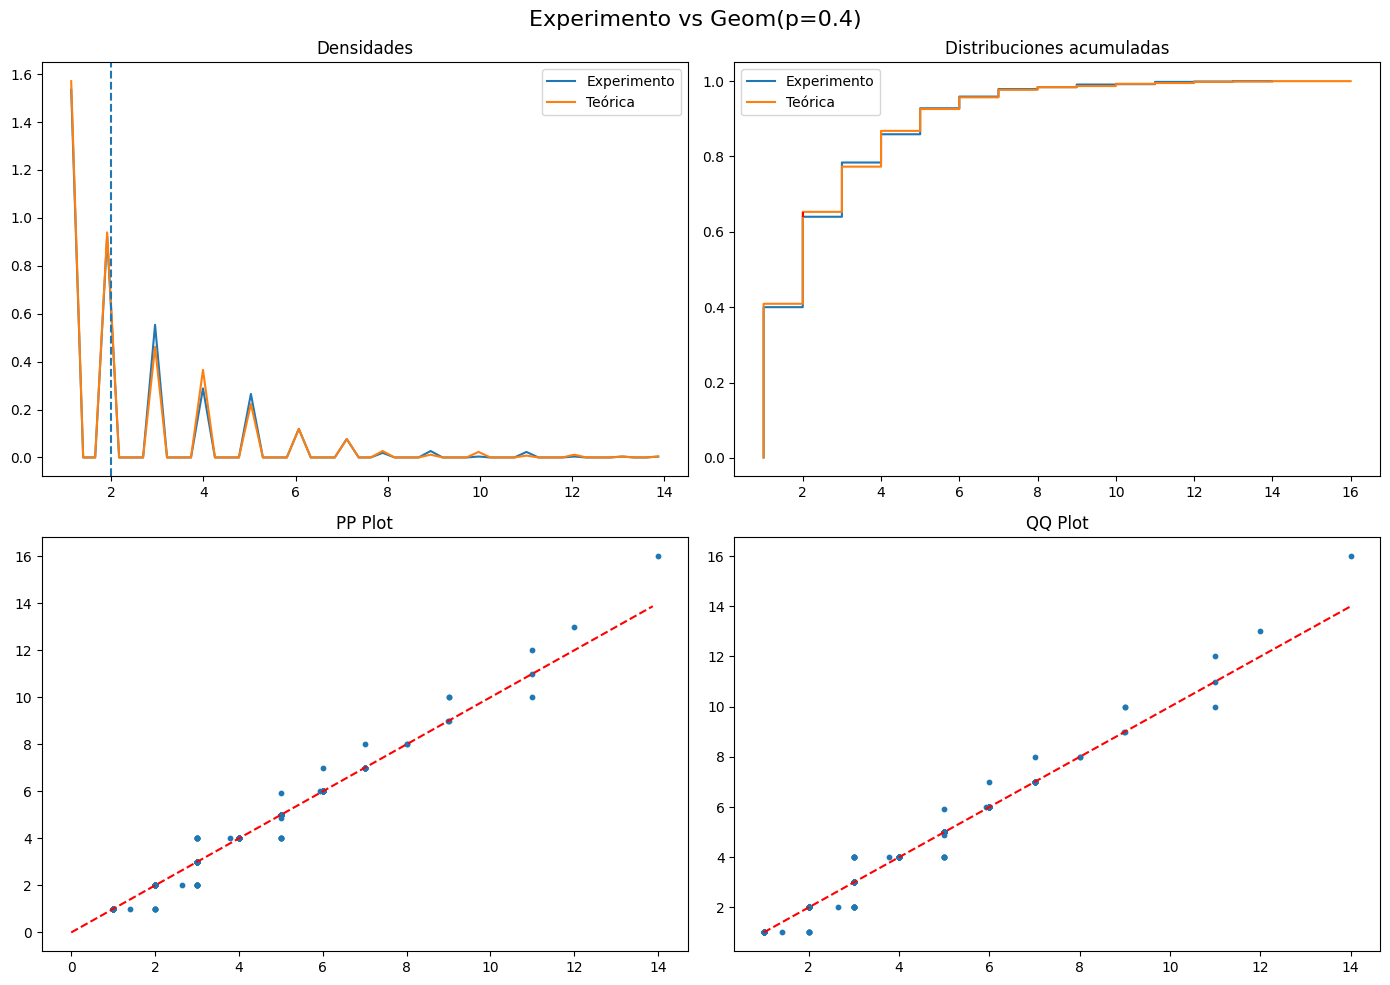

Distancia KS = 0.013

Comparación: Experimento vs Geom(q)


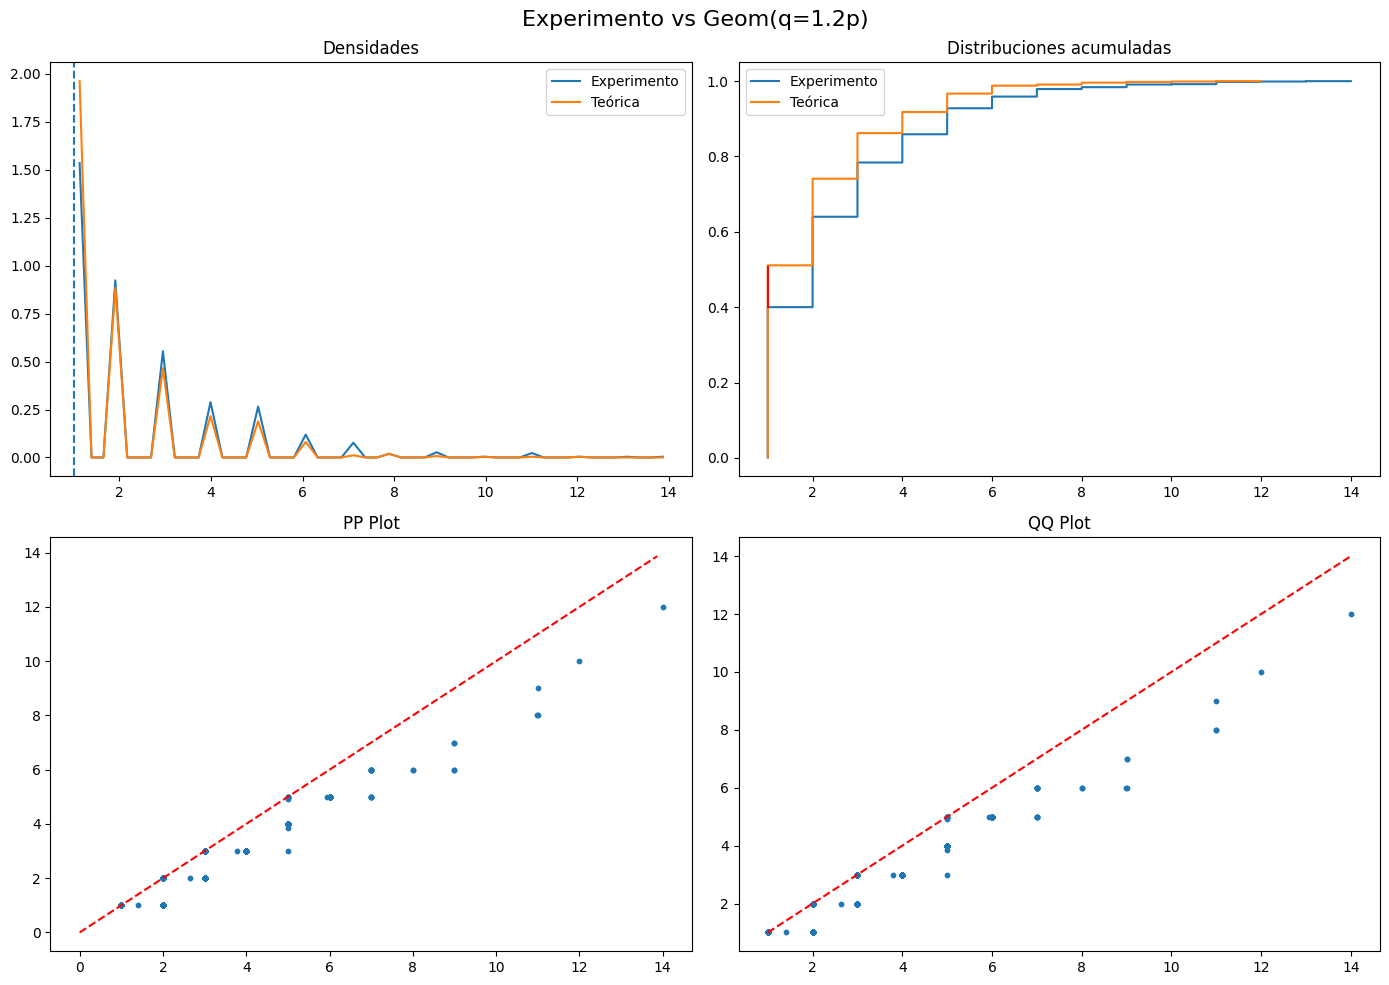

Distancia KS = 0.111


In [ ]:
def simular_geom(p, N=1000):
    resultados = []
    
    for _ in range(N):
        contador = 0
        while True:
            contador += 1
            if np.random.rand() < p:
                break
        resultados.append(contador)
    
    return np.array(resultados)

# Función para comparar muestras
def comparar_muestras(muestra1, muestra2, titulo=""):
    
    muestra1 = np.array(muestra1)
    muestra2 = np.array(muestra2)

    # ===== Funciones de densidad =====
    bins = 50
    
    hist1, edges = np.histogram(muestra1, bins=bins, density=True)
    hist2, _ = np.histogram(muestra2, bins=edges, density=True)
    
    centers = (edges[:-1] + edges[1:]) / 2

    # ===== Funciones de distribución =====
    x1_sorted = np.sort(muestra1)
    x2_sorted = np.sort(muestra2)

    F1 = np.arange(1, len(x1_sorted)+1) / len(x1_sorted)
    F2 = np.arange(1, len(x2_sorted)+1) / len(x2_sorted)

    # ===== Distancia KS =====
    ks_stat, _ = stats.ks_2samp(muestra1, muestra2)

    all_x = np.sort(np.concatenate([muestra1, muestra2]))

    cdf1 = np.searchsorted(x1_sorted, all_x, side='right') / len(x1_sorted)
    cdf2 = np.searchsorted(x2_sorted, all_x, side='right') / len(x2_sorted)

    diff = np.abs(cdf1 - cdf2)
    idx = np.argmax(diff)

    ks_x = all_x[idx]
    ks_y1 = cdf1[idx]
    ks_y2 = cdf2[idx]

    # ===== GRAFICAS =====
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Densidades
    axs[0,0].plot(centers, hist1, label="Experimento")
    axs[0,0].plot(centers, hist2, label="Teórica")
    axs[0,0].axvline(ks_x, linestyle="--")
    axs[0,0].set_title("Densidades")
    axs[0,0].legend()

    # CDF
    axs[0,1].step(x1_sorted, F1, label="Experimento")
    axs[0,1].step(x2_sorted, F2, label="Teórica")
    axs[0,1].vlines(ks_x, ks_y1, ks_y2, color="red")
    axs[0,1].set_title("Distribuciones acumuladas")
    axs[0,1].legend()

    # PP Plot
    quantiles = np.linspace(0,1,500)
    axs[1,0].scatter(
        np.quantile(muestra1, quantiles),
        np.quantile(muestra2, quantiles),
        s=10
    )
    axs[1,0].plot([0, max(centers)], [0, max(centers)], 'r--')
    axs[1,0].set_title("PP Plot")

    # QQ Plot
    q1 = np.quantile(muestra1, quantiles)
    q2 = np.quantile(muestra2, quantiles)

    axs[1,1].scatter(q1, q2, s=10)
    axs[1,1].plot([min(q1), max(q1)],
                  [min(q1), max(q1)], 'r--')
    axs[1,1].set_title("QQ Plot")

    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

    print("Distancia KS =", ks_stat)

p = 0.4
N = 1000

print("Usando p =", p)

# Muestras

muestra_exp = simular_geom(p, N)
muestra_geom_p = geom.rvs(p, size=N)

q = min(1.2*p, 0.99)
muestra_geom_q = geom.rvs(q, size=N)

# Comparaciones

print("\nComparación: Experimento vs Geom(p)")
comparar_muestras(muestra_exp, muestra_geom_p,
                  titulo=f"Experimento vs Geom(p={p})")

print("\nComparación: Experimento vs Geom(q)")
comparar_muestras(muestra_exp, muestra_geom_q,
                  titulo=f"Experimento vs Geom(q=1.2p)")



Con Geom (p) de p fijo = 0.4, la distancia KS = 0.013 indica un ajuste perfecto entre la muestra experimental y la distribución geométrica teórica. Las densidades coinciden casi completamente, especialmente en los valores pequeños donde se concentra la mayor probabilidad, y la media experimental es muy cercana a la teórica. Las curvas acumuladas están casi superpuestas, mostrando una diferencia máxima de apenas 1.3%. Además, los PP y QQ plots presentan los puntos alineados con la diagonal, sin desviaciones sistemáticas. Lo anterior confirma que el modelo describe adecuadamente los datos.

Con Geom (q = 1.2p), donde se modifica el parámetro respecto al valor real, la distancia KS = 0.111 refleja un desajuste notable. La distribución teórica concentra más probabilidad en valores pequeños, mientras que la experimental presenta una cola más pesada, generando una separación visible en las curvas acumuladas (hasta 11.1%). En los PP y QQ plots se observan desviaciones sistemáticas respecto a la diagonal, especialmente en cuantiles medios y altos. Esto indica que el parámetro no está bien calibrado y que el modelo no representa correctamente los datos.

## Ejercicio 5

In [5]:
from scipy.stats import ks_2samp

# i) Experimento vs Geom(p)
ks_stat1, pvalue1 = ks_2samp(muestra_exp, muestra_geom_p)

print("\n(i) Experimento vs Geom(p)")
print("KS statistic:", ks_stat1)
print("p-value:", pvalue1)

if pvalue1 < 0.05:
    print("Conclusión: Se rechaza H0 (distribuciones diferentes)")
else:
    print("Conclusión: NO se rechaza H0 (distribuciones iguales)")


# ii) Experimento vs Geom(q)
ks_stat2, pvalue2 = ks_2samp(muestra_exp, muestra_geom_q)

print("\n(ii) Experimento vs Geom(q)")
print("KS statistic:", ks_stat2)
print("p-value:", pvalue2)

if pvalue2 < 0.05:
    print("Conclusión: Se rechaza H0 (distribuciones diferentes)")
else:
    print("Conclusión: NO se rechaza H0 (distribuciones iguales)")



(i) Experimento vs Geom(p)
KS statistic: 0.013
p-value: 0.9999962022688547
Conclusión: NO se rechaza H0 (distribuciones iguales)

(ii) Experimento vs Geom(q)
KS statistic: 0.111
p-value: 8.74452446093763e-06
Conclusión: Se rechaza H0 (distribuciones diferentes)


Los resultados de la prueba de Kolmogorov-Smirnov muestran que, al comparar la muestra experimental con la distribución Geom(p), el estadístico KS es muy pequeño (0.013) y el p-value es muy alto (≈ 0.9999), por lo que no se rechaza la hipótesis nula, lo que indica que no existe evidencia estadística suficiente para afirmar que las distribuciones sean diferentes. En conclusión, son muestras iguales. En contraste, al comparar la muestra experimental con Geom(q), el estadístico KS es mayor (0.111) y el p-value es muy pequeño, por lo que se rechaza la hipótesis nula, concluyéndose que sí existe evidencia estadística de que las distribuciones son distintas.

## Ejercicio 6

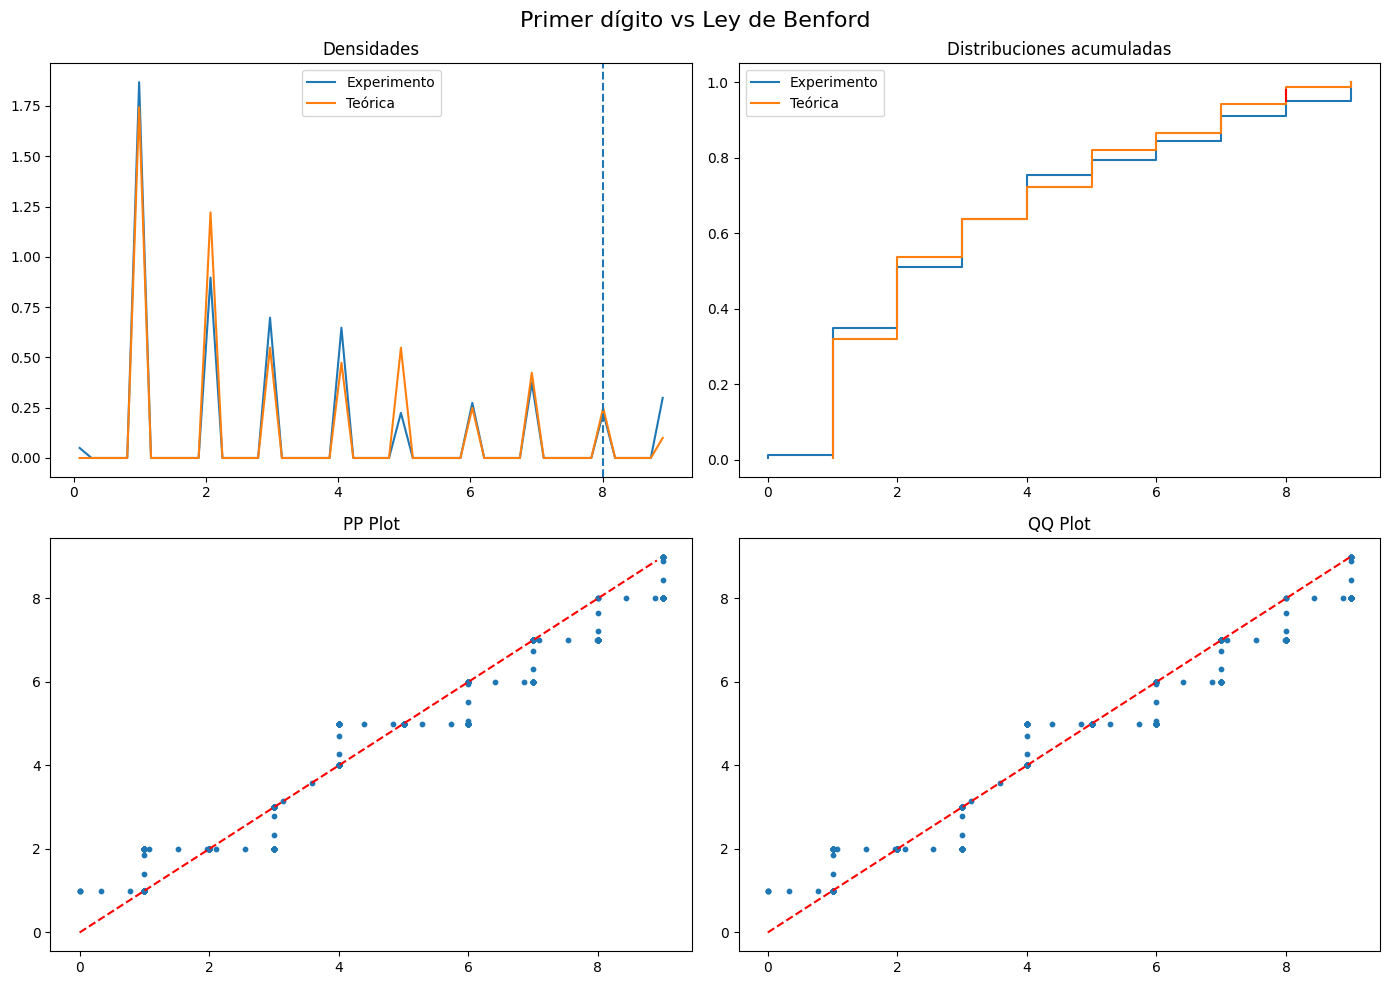

Distancia KS = 0.03587443946188341
(Ley de Benford)
KS statistic: 0.03587443946188341
p-value: 0.9988441865005643
Conclusión: NO se rechaza H0 (distribuciones iguales)


In [ ]:
# Leer el archivo de áreas
df = pd.read_csv("areas.csv", sep=";")
areas = pd.to_numeric(df["Area in square miles"], errors="coerce")

# Función para obtener el primer dígito
def primer_digito(x):
    x = abs(int(x))
    while x >= 10:
        x //= 10
    return x

digitos = np.array([primer_digito(a) for a in areas if not np.isnan(a) and a > 0])

# Distribución teórica de Benford
d = np.arange(1, 10)
prob_benford = np.log10(1 + 1/d)
muestra_benford = np.random.choice(d, size=len(digitos), p=prob_benford)

# Se llama a la función realizada en el inciso 4
comparar_muestras(digitos, muestra_benford,
                  titulo="Primer dígito vs Ley de Benford")

# Prueba KS 
ks_stat, pvalue = ks_2samp(digitos, muestra_benford)

print("(Ley de Benford)")
print("KS statistic:", ks_stat)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("Conclusión: Se rechaza H0 (distribuciones diferentes)")
else:
    print("Conclusión: NO se rechaza H0 (distribuciones iguales)")



Los resultados indican que los datos del primer dígito de las áreas de los países siguen el comportamiento esperado por la Ley de Benford. Esto se observa en las distribuciones empírica y teórica porque son muy similares en las gráficas, especialmente en las distribuciones acumuladas y en los gráficos PP y QQ, donde los puntos se alinean cerca de la recta de referencia.

Además, la prueba de Kolmogorov-Smirnov arroja una distancia KS muy pequeña (≈ 0.036) y un p-valor muy alto (≈ 0.999), lo cual significa que no existe evidencia estadística suficiente para afirmar que las distribuciones sean diferentes. Por lo tanto, se concluye que el primer dígito de las áreas de los países se comporta de acuerdo a la Ley de Benford.

## Ejercicio 7

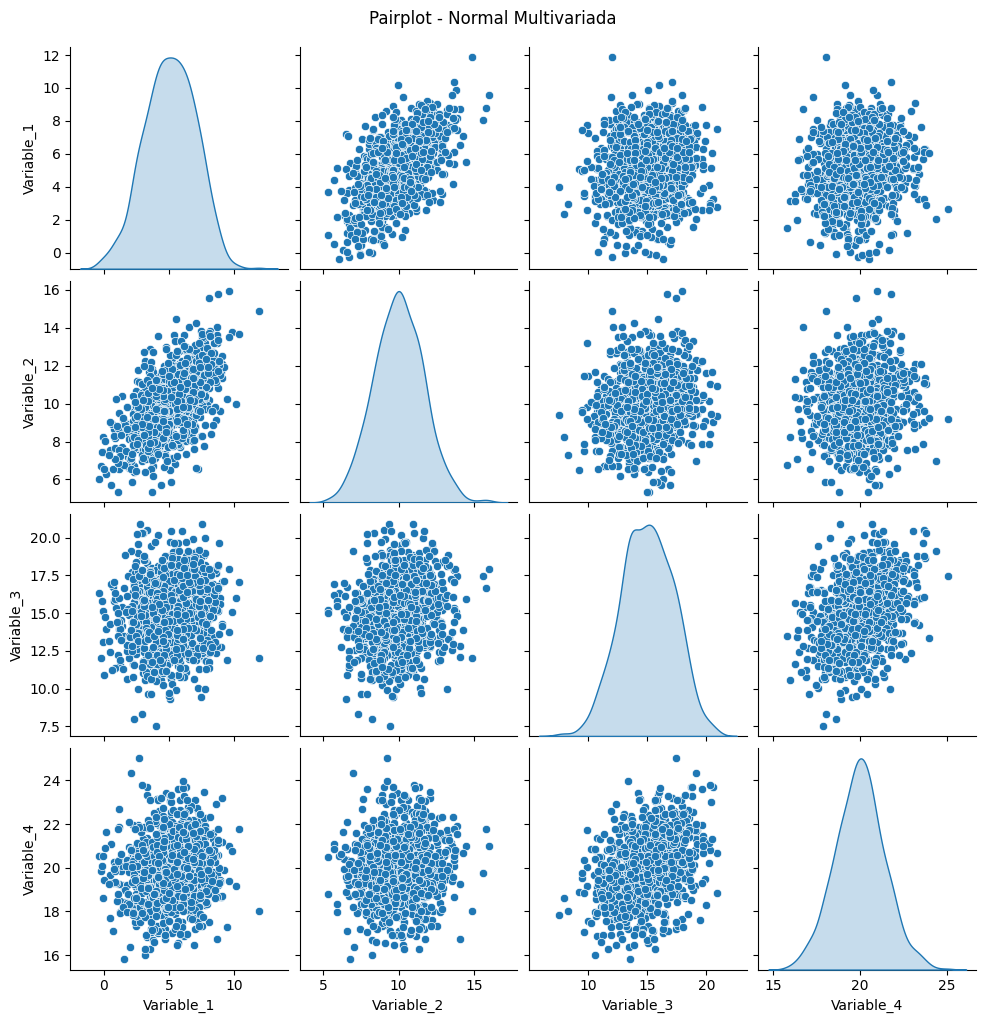

In [2]:
# Definir parámetros
n = 4 

# Vector de medias (μ)
mu = np.array([5, 10, 15, 20])

# Matriz de covarianza (Σ)
Sigma = np.array([
    [4, 2, 1, 0.5],
    [2, 3, 0.8, 0.3],
    [1, 0.8, 5, 1.2],
    [0.5, 0.3, 1.2, 2]
])

# Generación de muestra aleatoria
num_muestras = 1000

datos = np.random.multivariate_normal(mu, Sigma, num_muestras)

columnas = [f"Variable_{i+1}" for i in range(n)]
df = pd.DataFrame(datos, columns=columnas)

# Pairplot
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot - Normal Multivariada", y=1.02)
plt.show()

El pairplot muestra que cada variable sigue una distribución aproximadamente normal, lo cual se observa en las curvas suaves de la diagonal. Además, se aprecia una correlación positiva moderada entre la Variable 1 y la Variable 2, ya que sus nubes de puntos tienen forma inclinada, mientras que el resto de pares presentan relaciones más débiles o casi nulas, evidenciadas por nubes más dispersas y circulares.

## Ejercicio 8

In [42]:
wine = pd.read_csv("winequality-red.csv", sep=";")

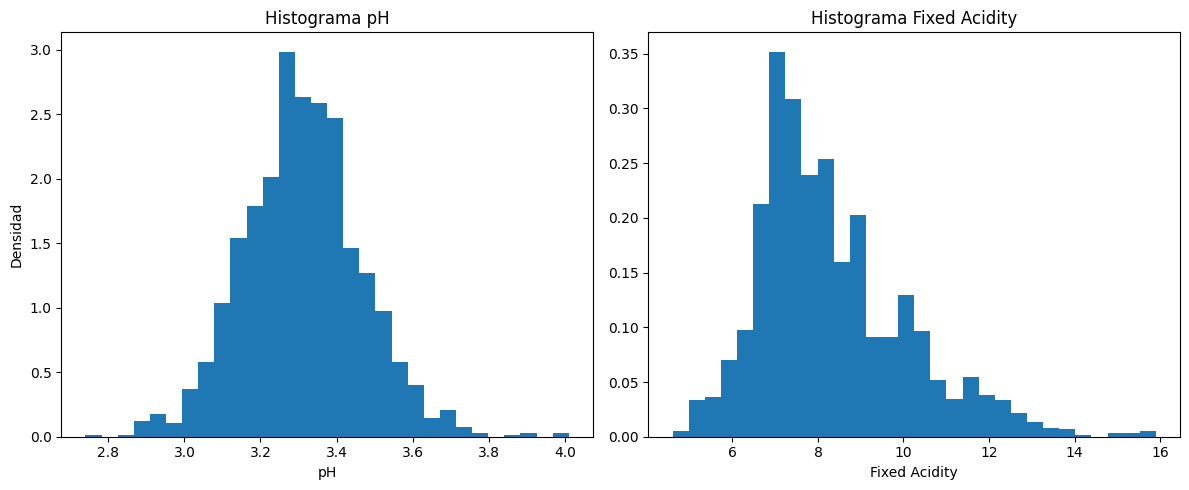

In [53]:
ph = wine["pH"]
fixed_acidity = wine["fixed acidity"]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- pH ---
axes[0].hist(ph, bins=30, density=True)
axes[0].set_title("Histograma pH")
axes[0].set_xlabel("pH")
axes[0].set_ylabel("Densidad")

# --- Fixed Acidity ---
axes[1].hist(fixed_acidity, bins=30, density=True)
axes[1].set_title("Histograma Fixed Acidity")
axes[1].set_xlabel("Fixed Acidity")

plt.tight_layout()
plt.show()


A partir de los histogramas, se observa que la variable pH presenta una forma aproximadamente simétrica y unimodal, lo que sugiere que podría ajustarse adecuadamente a una distribución Normal.

Por otro lado, la variable fixed acidity presenta asimetría positiva y una cola hacia la derecha, lo que indica que distribuciones como la Gamma o Lognormal serían candidatas más apropiadas que la Normal.

In [50]:
def comparar_distribuciones(data, nombre_variable):
    
    distribuciones = {
        "Normal": stats.norm,
        "Gamma": stats.gamma,
        "Lognormal": stats.lognorm,
        "Exponencial": stats.expon
    }
    
    resultados = []
    
    for nombre, dist in distribuciones.items():
        params = dist.fit(data)
        
        # Kolmogorov-Smirnov
        D, pval = stats.kstest(data, dist.name, args=params)
        
        # Log-likelihood
        loglik = np.sum(dist.logpdf(data, *params))
        
        # AIC
        k = len(params)
        AIC = 2*k - 2*loglik
        
        resultados.append([nombre, D, pval, AIC])
    
    resultados = sorted(resultados, key=lambda x: x[3])  # ordenar por AIC
    
    print(f"\nResultados para {nombre_variable}")
    print("Distribución | KS | p-value | AIC")
    for r in resultados:
        print(r)
    
    return resultados


res_ph = comparar_distribuciones(ph, "pH")
res_fixed = comparar_distribuciones(fixed_acidity, "Fixed Acidity")


Resultados para pH
Distribución | KS | p-value | AIC
['Lognormal', np.float64(0.03627786062523952), np.float64(0.02899796426741441), np.float64(-1439.0062576991793)]
['Gamma', np.float64(0.03635698076192939), np.float64(0.028468159158850925), np.float64(-1438.5775447113597)]
['Normal', np.float64(0.040307576089095076), np.float64(0.010773304065325657), np.float64(-1434.0464759045492)]
['Exponencial', np.float64(0.3964843954148258), np.float64(3.434327751772417e-227), np.float64(1410.5832229449175)]

Resultados para Fixed Acidity
Distribución | KS | p-value | AIC
['Lognormal', np.float64(0.05129345996915685), np.float64(0.0004269563393090614), np.float64(6057.806781626918)]
['Gamma', np.float64(0.058771803965356084), np.float64(3.045311196874443e-05), np.float64(6070.643853558635)]
['Normal', np.float64(0.11050460798947254), np.float64(1.8409932346877605e-17), np.float64(6314.104031058005)]
['Exponencial', np.float64(0.31396348392869267), np.float64(1.4239598322103138e-140), np.float64

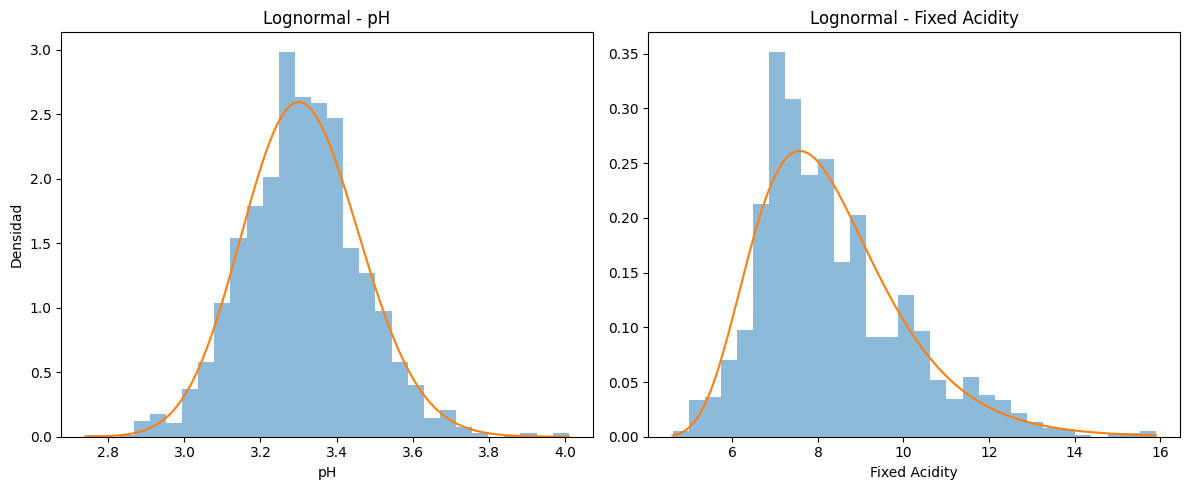

In [52]:
# Ajustar Lognormal
params_ph = stats.lognorm.fit(ph)
params_fixed = stats.lognorm.fit(fixed_acidity)

# Crear valores para graficar
x_ph = np.linspace(min(ph), max(ph), 200)
x_fixed = np.linspace(min(fixed_acidity), max(fixed_acidity), 200)

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- pH ---
axes[0].hist(ph, bins=30, density=True, alpha=0.5)
axes[0].plot(x_ph, stats.lognorm.pdf(x_ph, *params_ph))
axes[0].set_title("Lognormal - pH")
axes[0].set_xlabel("pH")
axes[0].set_ylabel("Densidad")

# --- Fixed Acidity ---
axes[1].hist(fixed_acidity, bins=30, density=True, alpha=0.5)
axes[1].plot(x_fixed, stats.lognorm.pdf(x_fixed, *params_fixed))
axes[1].set_title("Lognormal - Fixed Acidity")
axes[1].set_xlabel("Fixed Acidity")

plt.tight_layout()
plt.show()

Para la variable pH, la distribución que mejor se ajusta es la Lognormal, ya que presenta el menor valor de AIC y el menor estadístico KS entre las distribuciones consideradas. Aunque visualmente la Normal parecía adecuada, los criterios cuantitativos favorecen ligeramente el modelo Lognormal.

Para la variable fixed acidity, la distribución Lognormal también resulta ser la mejor candidata, mostrando el menor AIC y el mejor desempeño en la prueba de Kolmogorov–Smirnov. Esto es consistente con la asimetría positiva observada en el histograma.

En conclusión, según los criterios de ajuste estadístico y comparación de modelos, la distribución Lognormal es la que mejor describe ambas variables dentro de las opciones analizadas.